# **Case study: Analysis and Optimization of Energy Consumption**

### Necessary imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Phase 1: Data collection and preparation

Objective: Prepare a clean, usable dataset for analysis and modeling.

## 1. Data collection 

- Identify and gather data from a variety of accessible sources (e.g. internal company data, public data, IoT sensors, weather data ....).
- The choice of data sources is free, but they must be relevant to the analysis of energy consumption.

For this project, we chose a dataset on energy consumption, specifically electricity usage data from 881 companies and local authorities across six French overseas regions : Réunion Island, French Guiana, Martinique, Guadeloupe, Mayotte, and Corsica. The data was collected between 2021 and 2024.

We aim to use this dataset to predict the weekly energy consumption of a company.

In [ ]:
data = pd.read_csv('EN_export.csv')

## I. Data analysis

In [ ]:
data.head()

,year-Wweek,user_id,site_id,department,nace_code,insee_code,weekly_E_kWh,weekly_dd_heating_15,weekly_dd_heating_16,weekly_dd_heating_17,...,min_indoor_humidity_13,mean_indoor_humidity_14,max_indoor_humidity_14,min_indoor_humidity_14,mean_indoor_humidity_15,max_indoor_humidity_15,min_indoor_humidity_15,mean_indoor_humidity_16,max_indoor_humidity_16,min_indoor_humidity_16
0,2021-W19,458,513,Martinique,72.19,97209,645.595,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-W20,458,513,Martinique,72.19,97209,621.710,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-W21,458,513,Martinique,72.19,97209,593.756,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-W22,458,513,Martinique,72.19,97209,598.007,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-W23,458,513,Martinique,72.19,97209,616.960,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(42288, 112)

Our dataset contains 42,288 records and 112 columns.

It appears that we have several NaN values. Let's organize this properly.

## 2. Cleaning and Data Preparation :

- Manage missing values, inconsistencies and anomalies (e.g. outliers).
- Standardize formats (dates, consumption units, etc.) to guarantee data consistency.
- Create new variables if necessary, such as consumption periods (off-peak, peak, seasonal, etc.).

### a. Data cleaning

In [ ]:
data.isnull().sum()

,0
year-Wweek,0
user_id,0
site_id,0
department,0
nace_code,0
...,...
max_indoor_humidity_15,42254
min_indoor_humidity_15,42254
mean_indoor_humidity_16,42254
max_indoor_humidity_16,42254


We will delete any columns that have more than half of their values missing.

In [ ]:
data = data.dropna(thresh=2/4 * len(data), axis=1)

In [ ]:
data.isnull().sum()

,0
year-Wweek,0
user_id,0
site_id,0
department,0
nace_code,0
insee_code,0
weekly_E_kWh,5358
weekly_dd_heating_15,641
weekly_dd_heating_16,641
weekly_dd_heating_17,641


We delete the rows that have more than 20% of their values missing.

In [ ]:
# Définir le seuil (20% des colonnes)
seuil = 1/5 * len(data.columns)

# Supprimer les lignes avec au moins 1/5 de valeurs manquantes
data = data.dropna(axis=0, thresh=len(data.columns) - seuil)

In [ ]:
data.shape

(21475, 28)

In [ ]:
data.isnull().sum()

,0
year-Wweek,0
user_id,0
site_id,0
department,0
nace_code,0
insee_code,0
weekly_E_kWh,1044
weekly_dd_heating_15,0
weekly_dd_heating_16,0
weekly_dd_heating_17,0


Since 'weekly_E_kWh' is the target column for prediction, we will delete all rows with missing values in this column.

In [ ]:
data = data.dropna(subset=['weekly_E_kWh'])

In [ ]:
data.shape

(20431, 28)

After cleaning, our dataset contains 20,431 rows and 28 columns.

In [ ]:
# Get the column names
column_names = data.columns.tolist()
column_names

['year-Wweek',
 'user_id',
 'site_id',
 'department',
 'nace_code',
 'insee_code',
 'weekly_E_kWh',
 'weekly_dd_heating_15',
 'weekly_dd_heating_16',
 'weekly_dd_heating_17',
 'weekly_dd_heating_18',
 'weekly_dd_cooling_22',
 'weekly_dd_cooling_23',
 'weekly_dd_cooling_24',
 'weekly_dd_cooling_25',
 'weekly_dd_cooling_26',
 'mean_indoor_temperature_00',
 'max_indoor_temperature_00',
 'min_indoor_temperature_00',
 'mean_indoor_humidity_00',
 'max_indoor_humidity_00',
 'min_indoor_humidity_00',
 'mean_indoor_temperature_01',
 'max_indoor_temperature_01',
 'min_indoor_temperature_01',
 'mean_indoor_humidity_01',
 'max_indoor_humidity_01',
 'min_indoor_humidity_01']

Brief description of each column in our dataset:


*   year-Wweek – The year and week number (e.g., 2024-W10) indicating the time period of the data.
* user_id – Unique identifier for each user.
* site_id – Unique identifier for each site (a building or a group of buildings).
* department – Name of the department where the sensor is located (e.g., South Corsica, Upper Corsica, Guadeloupe, etc.).
* nace_code – NACE code representing the type of activity of the company.
* insee_code – INSEE code representing the municipality.
* weekly_E_kWh – Weekly electricity consumption in kilowatt-hours (kWh).
* weekly_dd_heating_15 – Weekly Heating Degree-Days (HDD) based on the reference temperature 15°C, indicating heating demand.
* weekly_dd_heating_16 – HDD with a base temperature of 16°C.
* weekly_dd_heating_17 – HDD with a base temperature of 17°C.
* weekly_dd_heating_18 – HDD with a base temperature of 18°C.
* weekly_dd_cooling_22 – Weekly Cooling Degree-Days (CDD) based on the reference temperature 22°C, indicating cooling demand.
* weekly_dd_cooling_23 – CDD with a base temperature of 23°C.
* weekly_dd_cooling_24 – CDD with a base temperature of 24°C.
* weekly_dd_cooling_25 – CDD with a base temperature of 25°C.
* weekly_dd_cooling_26 – CDD with a base temperature of 26°C.
* mean_indoor_temperature_00 – The average indoor temperature for sensor 00 during the week.
* max_indoor_temperature_00 – The maximum recorded indoor temperature for sensor 00.
* min_indoor_temperature_00 – The minimum recorded indoor temperature for sensor 00.
* mean_indoor_humidity_00 – The average indoor humidity for sensor 00 during the week.
* max_indoor_humidity_00 – The maximum recorded indoor humidity for sensor 00.
* min_indoor_humidity_00 – The minimum recorded indoor humidity for sensor 00.
* mean_indoor_temperature_01 – The average indoor temperature for sensor 01 during the week.
* max_indoor_temperature_01 – The maximum recorded indoor temperature for sensor 01.
* min_indoor_temperature_01 – The minimum recorded indoor temperature for sensor 01.
* mean_indoor_humidity_01 – The average indoor humidity for sensor 01 during the week.
* max_indoor_humidity_01 – The maximum recorded indoor humidity for sensor 01.
* min_indoor_humidity_01 – The minimum recorded indoor humidity for sensor 01.



In [ ]:
data.head()

,year-Wweek,user_id,site_id,department,nace_code,insee_code,weekly_E_kWh,weekly_dd_heating_15,weekly_dd_heating_16,weekly_dd_heating_17,...,min_indoor_temperature_00,mean_indoor_humidity_00,max_indoor_humidity_00,min_indoor_humidity_00,mean_indoor_temperature_01,max_indoor_temperature_01,min_indoor_temperature_01,mean_indoor_humidity_01,max_indoor_humidity_01,min_indoor_humidity_01
0,2021-W19,458,513,Martinique,72.19,97209,645.595,0.0,0.0,0.0,...,22.37,66.107,75.0,0.0,26.907,28.29,20.62,59.392,70.0,42.0
1,2021-W20,458,513,Martinique,72.19,97209,621.710,0.0,0.0,0.0,...,25.16,64.013,69.0,48.0,27.824,28.88,23.05,57.399,68.0,40.0
2,2021-W21,458,513,Martinique,72.19,97209,593.756,0.0,0.0,0.0,...,23.71,63.005,73.0,0.0,27.766,28.88,22.24,56.550,66.0,44.0
3,2021-W22,458,513,Martinique,72.19,97209,598.007,0.0,0.0,0.0,...,23.48,65.250,73.0,54.0,27.348,29.07,22.32,58.278,65.0,42.0
4,2021-W23,458,513,Martinique,72.19,97209,616.960,0.0,0.0,0.0,...,23.68,69.894,76.0,55.0,27.310,29.19,22.11,62.415,71.0,0.0


### b. Outliers management

Let's check for any outliers in our dataset.

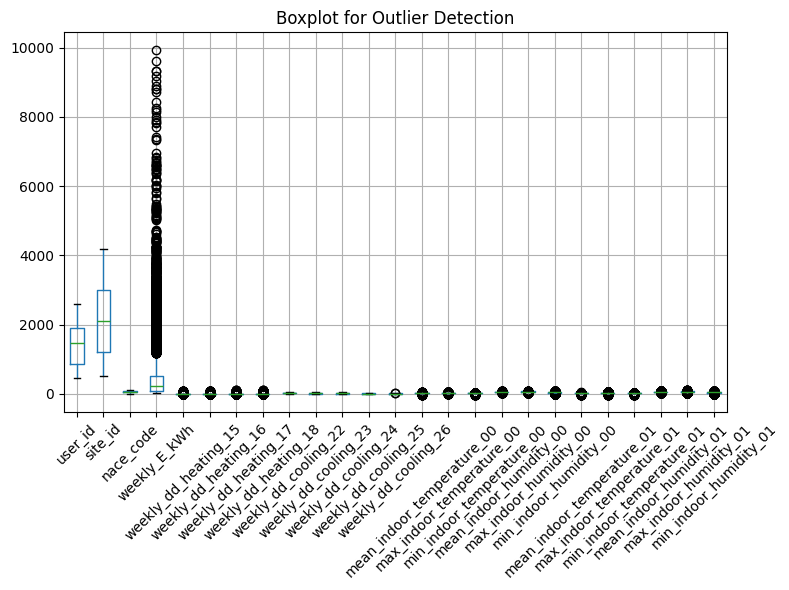

In [ ]:
# Boxplot for detecting outliers
data.boxplot(figsize=(8, 6))
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The column weekly_E_kWh represent the column that we want to predict, we can't change the outliers.

### c. Analyzing

Average weekly energy consumption per type of activity of the company

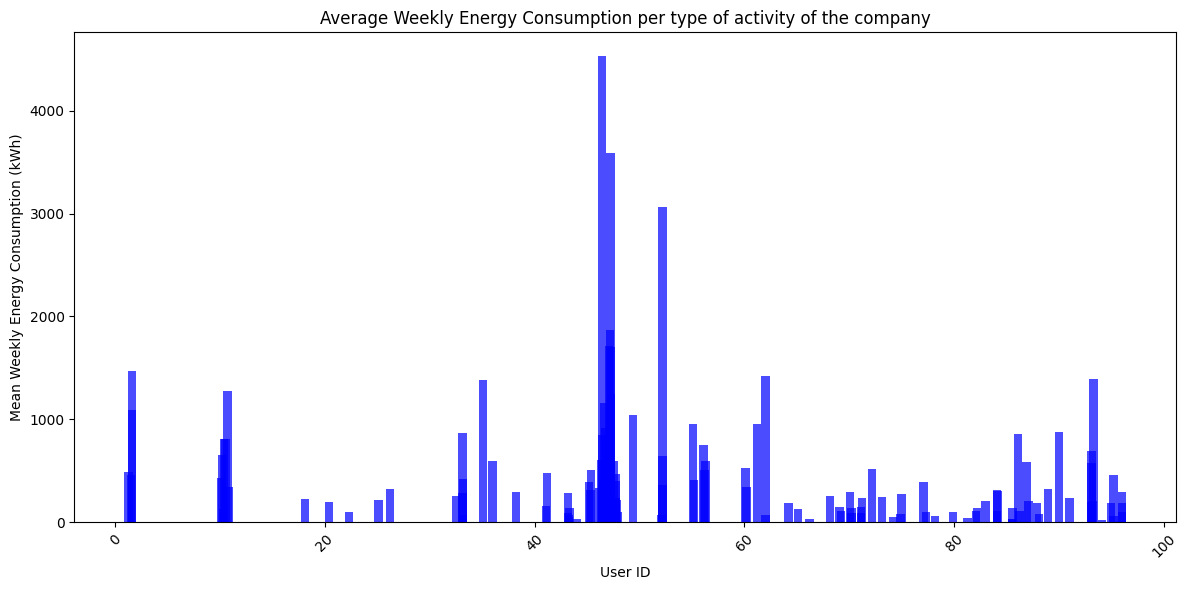

In [ ]:
# Compute the mean weekly_E_kWh for each nace_code
mean_consumption = data.groupby('nace_code')['weekly_E_kWh'].mean().reset_index()

# Rename the column for clarity
mean_consumption.rename(columns={'weekly_E_kWh': 'mean_weekly_E_kWh'}, inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(mean_consumption['nace_code'], mean_consumption['mean_weekly_E_kWh'], color='blue', alpha=0.7)
plt.xlabel("User ID")
plt.ylabel("Mean Weekly Energy Consumption (kWh)")
plt.title("Average Weekly Energy Consumption per type of activity of the company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average weekly energy consumption per user

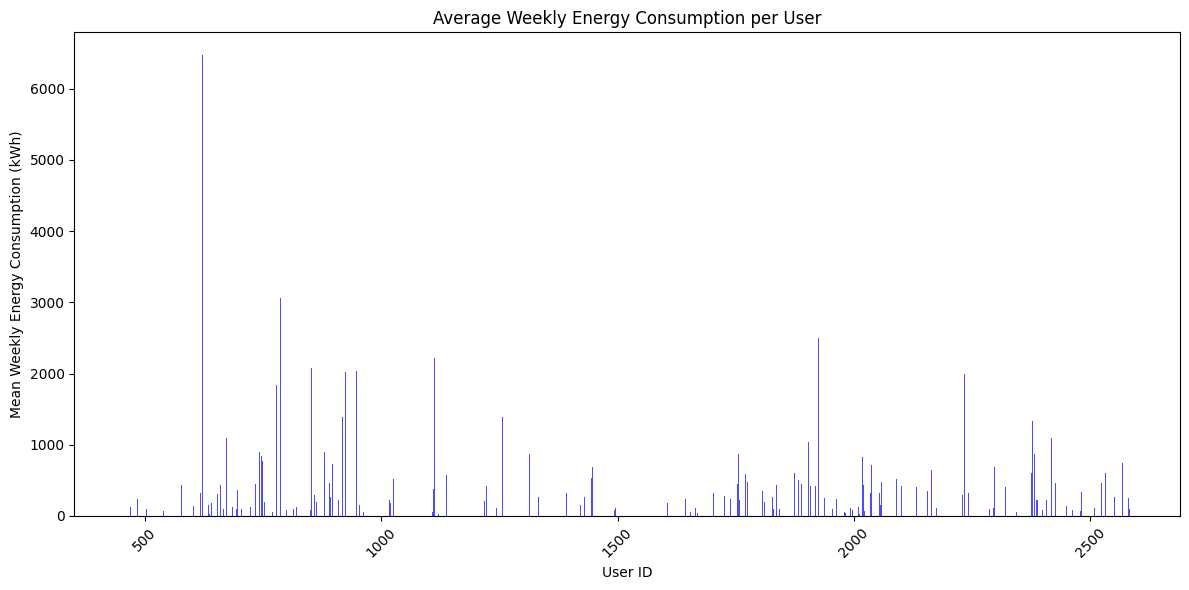

In [ ]:
# Compute the mean weekly_E_kWh for each user_id
mean_consumption = data.groupby('user_id')['weekly_E_kWh'].mean().reset_index()

# Rename the column for clarity
mean_consumption.rename(columns={'weekly_E_kWh': 'mean_weekly_E_kWh'}, inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(mean_consumption['user_id'], mean_consumption['mean_weekly_E_kWh'], color='blue', alpha=0.7)
plt.xlabel("User ID")
plt.ylabel("Mean Weekly Energy Consumption (kWh)")
plt.title("Average Weekly Energy Consumption per User")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It is evident that one user consumes significantly more energy than the others.

In [ ]:
data.to_csv("dataset_nettoye.csv", index=False)  # Sans index